# Sales Analysis

#### Import Necessary Libraries

In [1]:
import pandas as pd
from IPython.display import display
import os
import matplotlib.pyplot as plt

#### Task #1: Merge the 12 months of sales data into a single CSV file

In [2]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")

files =  [file for file in os.listdir('./Sales_Data')]

all_months_data = pd.DataFrame()
for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv("all_data.csv", index=False)

#### Read in updated dataframe

In [3]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Clean up the data!

#### Drops rows of NAN

In [4]:
all_data = all_data.dropna(how="any")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Find "Or" and delete 

In [5]:
all_data =  all_data[all_data["Order Date"].str[:2] != "Or"]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Convert columns to the correct type

In [6]:
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"])
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])

### Augment data with additional columns

### Task 2: Add Month Column

In [7]:
all_data["Month"] = all_data["Order Date"].str[:2]
all_data["Month"] = all_data["Month"].astype("int32")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Task 3: Add a sales column

In [8]:
all_data["Sales"] = all_data["Quantity Ordered"] * all_data["Price Each"]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Task 4: Add a city column

In [9]:
def get_city(address):
    return address.split(",")[1]

def get_state(address):
    return address.split(",")[2].split(" ")[1]


all_data["City"] = all_data["Purchase Address"].apply(lambda x: get_city(x) + " (" + get_state(x) + ")")

all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


#### Question 1: What was the best month for sales? How much was earned that month?

In [10]:
results = all_data.groupby("Month").sum()


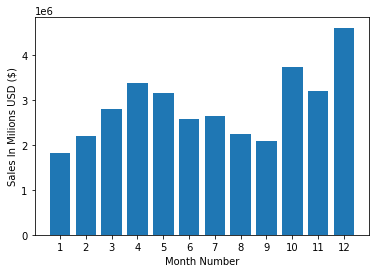

In [11]:
months = range(1, 13)

plt.bar(months, results["Sales"])
plt.xticks(months)
plt.ylabel("Sales In Milions USD ($)")
plt.xlabel("Month Number")
plt.show()

#### Question 2: What city had the highest number of sales?

In [12]:
results = all_data.groupby("City").sum()
results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


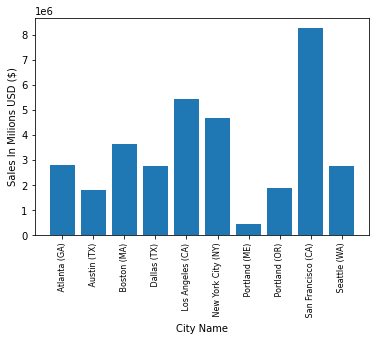

In [13]:
cities = [city for city, df in all_data.groupby("City")]
plt.bar(cities, results["Sales"])
plt.xticks(cities, rotation="vertical", size=8)
plt.ylabel("Sales In Milions USD ($)")
plt.xlabel("City Name")
plt.show()

#### Question 3: What time should we display advertisements to maximize likehood of customer's buying product?

In [14]:
all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])

In [15]:
all_data["Hour"] = all_data["Order Date"].dt.hour
all_data["Minute"] = all_data["Order Date"].dt.minute
all_data["Count"] = 1
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27,1


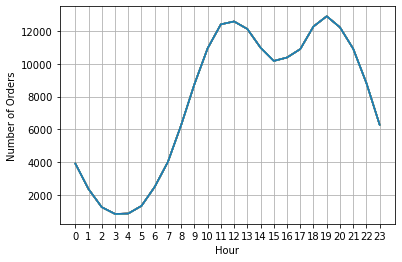

In [16]:
hours = [hour for hour, df in all_data.groupby("Hour")]
plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours, size="10")
plt.xlabel("Hour")
plt.ylabel("Number of Orders")
plt.grid()
plt.show()

# The best time to display advertisements is between 11:00 - 19:00

#### Question 4: What products are most often sold together

In [17]:
df = all_data[all_data["Order ID"].duplicated(keep=False)]

df["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))

df = df[["Order ID", "Grouped"]].drop_duplicates()
df.head()

<ipython-input-17-1e5c82710e30>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [18]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df["Grouped"]:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### Question 5: What product sold the most? and why it is sold the most

In [19]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27,1


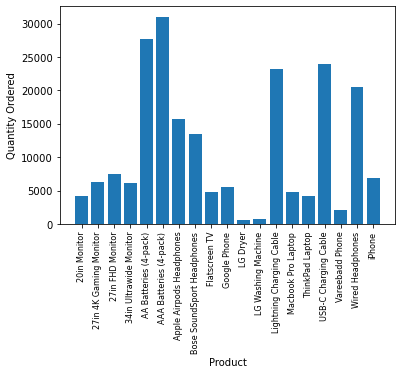

In [20]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()["Quantity Ordered"]

products = [product for product, df in product_group]
plt.bar(products, quantity_ordered)
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.xticks(products, rotation="vertical", size="8")

plt.show()

In [25]:
prices

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute,Count
Product,,,,,,,
20in Monitor,1.006828,109.99,7.153377,110.740968,14.329188,29.810290,1.0
27in 4K Gaming Monitor,1.002247,389.99,7.133226,390.866382,14.593258,29.587640,1.0
27in FHD Monitor,1.005728,149.99,7.001199,150.849141,14.325296,29.299054,1.0
34in Ultrawide Monitor,1.002912,379.99,7.005986,381.096588,14.411260,29.684517,1.0
AA Batteries (4-pack),1.343004,3.84,7.073820,5.157137,14.498809,29.598046,1.0
AAA Batteries (4-pack),1.502689,2.99,7.091226,4.493040,14.404922,29.655201,1.0
Apple Airpods Headphones,1.007203,150.00,7.040774,151.080455,14.361309,29.298990,1.0
Bose SoundSport Headphones,1.009906,99.99,7.062889,100.980520,14.442402,29.463640,1.0
Flatscreen TV,1.003958,300.00,7.130000,301.187500,14.336458,29.747708,1.0


<ipython-input-27-2d4f8e5abb6a>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


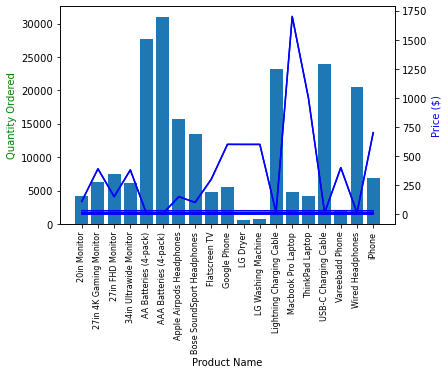

We can see that the product thah was sold the most is "AAA Batteries (4-pack)", and its because is the most cheapest and probably has more usage volume


In [27]:
prices = all_data.groupby('Product').mean(["Price Each"])

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered)
ax2.plot(products, prices, "b-")

ax1.set_xlabel("Product Name")
ax1.set_ylabel("Quantity Ordered", color="g")
ax2.set_ylabel("Price ($)", color="b")
ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()

print("We can see that the product thah was sold the most is \"AAA Batteries (4-pack)\", and its because is the most cheapest and probably has more usage volume")
